## Cargamos las Librerías:

In [1]:
import requests
import pandas as pd
import os
from dotenv import load_dotenv
import locale
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("white")
sns.set_context("notebook")
plt.rcParams.update({
    'font.family': 'serif',
    'mathtext.fontset': 'stix',
    'font.serif': 'Times New Roman',
    'figure.figsize': (11, 9.4),
    'axes.edgecolor': 'white',
    'axes.labelcolor': '#333333',
    'axes.titlesize': 20,
    'axes.titlecolor': '#333333',
    'xtick.color': '#333333',
    'ytick.color': '#333333',
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
})

## Guardamos el Token:

In [3]:
load_dotenv(dotenv_path='/home/barea/INEGI_API/.env')

token = os.getenv("INEGI_TOKEN")

## ID del Indicador:

In [4]:
serie_id = "441494,441515"

## EndPoint de Consulta:

In [5]:
url = f"https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/{serie_id}/es/0700/false/BIE/2.0/{token}?type=json"

In [6]:
print(url)

https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/441494,441515/es/0700/false/BIE/2.0/0f3e8a33-8776-d1b7-2615-657d9245b616?type=json


## Hacemos la Solicitud:

In [7]:
response = requests.get(url)
data = response.json()

In [8]:
data

{'Header': {'Name': 'Datos compactos BIE',
  'Email': 'atencion.usuarios@inegi.org.mx'},
 'Series': [{'INDICADOR': '441494',
   'FREQ': '3',
   'TOPIC': '11400340030000200090',
   'UNIT': '99',
   'UNIT_MULT': None,
   'NOTE': '2279',
   'SOURCE': '92',
   'LASTUPDATE': '14/08/2025 01:08:55 p. m.',
   'STATUS': None,
   'OBSERVATIONS': [{'TIME_PERIOD': '2024',
     'OBS_VALUE': '55482186.826',
     'OBS_EXCEPTION': '',
     'OBS_STATUS': '1',
     'OBS_SOURCE': '92',
     'OBS_NOTE': None,
     'COBER_GEO': '00'},
    {'TIME_PERIOD': '2023',
     'OBS_VALUE': '53253307.601',
     'OBS_EXCEPTION': '',
     'OBS_STATUS': '',
     'OBS_SOURCE': '92',
     'OBS_NOTE': None,
     'COBER_GEO': '00'},
    {'TIME_PERIOD': '2022',
     'OBS_VALUE': '48558677.725',
     'OBS_EXCEPTION': '',
     'OBS_STATUS': '',
     'OBS_SOURCE': '92',
     'OBS_NOTE': None,
     'COBER_GEO': '00'},
    {'TIME_PERIOD': '2021',
     'OBS_VALUE': '39804690.857',
     'OBS_EXCEPTION': '',
     'OBS_STATUS': '',
 

## Extraemos los Datos:

In [9]:
serie_ingresos_brutos = data['Series'][0]['OBSERVATIONS']
serie_deuda_publica = data['Series'][1]['OBSERVATIONS']

In [10]:
años = [obs['TIME_PERIOD'] for obs in serie_ingresos_brutos]
val_ingresos_brutos = [float(obs['OBS_VALUE']) for obs in serie_ingresos_brutos]
val_deuda_publica = [float(obs['OBS_VALUE']) for obs in serie_deuda_publica]

In [ ]:
unidad_dict = {
    '1': 'Índice base 1978 = 100',
    '2': 'Índice base 1980 = 100',
    '4': 'Kilogramos',
    '5': 'Kilómetros',
    '7': 'Miles de barriles por día',
    '10': 'Miles de kilómetros',
    '11': 'Miles de KWH',
    '13': 'Millones de nuevos pesos a precios de 1980',
    '14': 'Millones de pesos a precios corrientes',
    '17': 'Miles de pasajeros',
    '18': 'Miles de personas'
}

unidad_oro = unidad_dict.get(data['Series'][0]['UNIT'], 'Desconocida')
unidad_plata = unidad_dict.get(data['Series'][1]['UNIT'], 'Desconocida')

print(f"Oro (Unidad): {unidad_oro}")
print(f"Plata (Unidad): {unidad_plata}")

## Creamos el DataFrame:

In [11]:
finanzas = pd.DataFrame({
    'Año': años,
    'Ingresos_brutos': val_ingresos_brutos,
    'Deuda_publica': val_deuda_publica
})

In [12]:
finanzas.head(15)

,Año,Ingresos_brutos,Deuda_publica
0,2024,5.548219e+07,1311306.551
1,2023,5.325331e+07,1280960.196
2,2022,4.855868e+07,1424115.983
3,2021,3.980469e+07,1351328.178
4,2020,4.297013e+07,744791.587
5,2019,3.884772e+07,644628.136
6,2018,3.980005e+07,705545.572
7,2017,3.956045e+07,1042975.118
8,2016,3.564327e+07,635395.756
9,2015,3.454824e+07,1428341.768


In [13]:
finanzas = finanzas.sort_values("Año")
finanzas["Año"] = finanzas["Año"].astype(int)

In [14]:
finanzas["deuda_ingresos_%"] = (finanzas["Deuda_publica"] / finanzas["Ingresos_brutos"]) * 100

In [15]:
finanzas["variacion_deuda_%"] = finanzas["Deuda_publica"].pct_change() * 100

In [16]:
finanzas

,Año,Ingresos_brutos,Deuda_publica,deuda_ingresos_%,variacion_deuda_%
35,1989,2.456156e+05,7482.330,3.046358,NaN
34,1990,3.368937e+05,18061.470,5.361178,141.388311
33,1991,4.373881e+05,21212.471,4.849805,17.445983
32,1992,7.282255e+05,30173.178,4.143384,42.242636
31,1993,7.766323e+05,0.000,0.000000,-100.000000
30,1994,9.004205e+05,0.000,0.000000,NaN
29,1995,1.079885e+06,114486.613,10.601739,inf
28,1996,1.403655e+06,34663.307,2.469504,-69.722830
27,1997,1.890789e+06,23808.953,1.259207,-31.313671
26,1998,2.440401e+06,167137.109,6.848757,601.992687


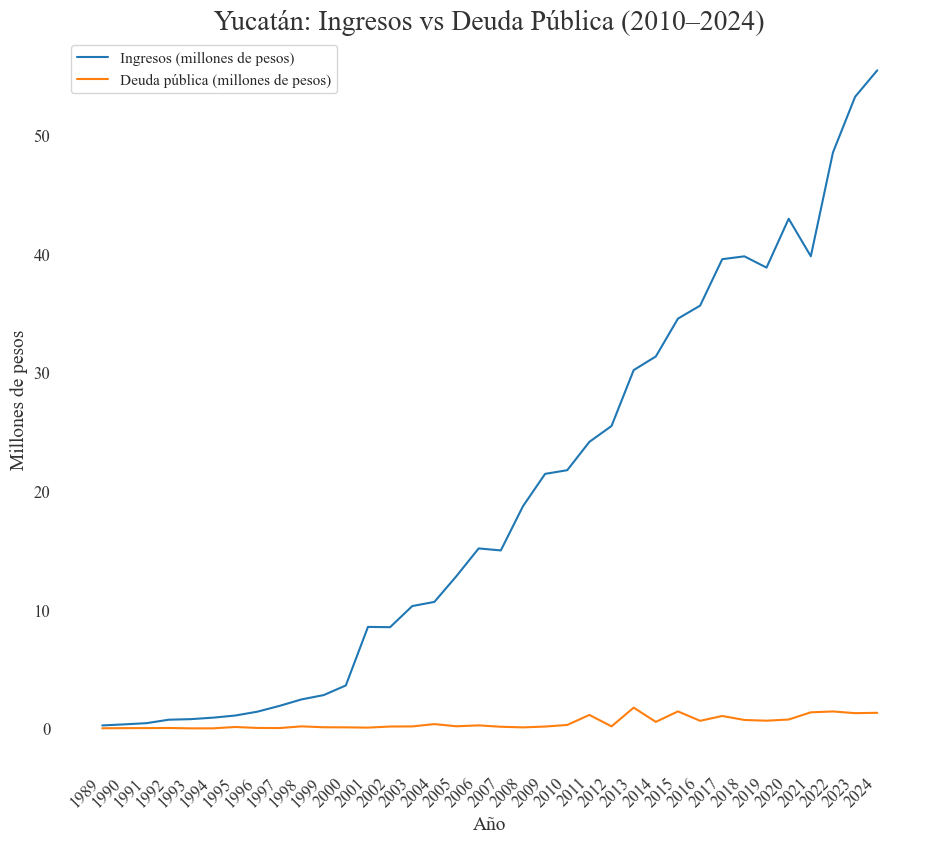

In [17]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.plot(finanzas["Año"], finanzas["Ingresos_brutos"]/1e6, label="Ingresos (millones de pesos)")
ax1.plot(finanzas["Año"], finanzas["Deuda_publica"]/1e6, label="Deuda pública (millones de pesos)")
ax1.set_ylabel("Millones de pesos")
ax1.set_xlabel("Año")
ax1.legend()

ax1.set_xticks(finanzas["Año"])
ax1.set_xticklabels(finanzas["Año"], rotation=45, ha='right')

plt.title("Yucatán: Ingresos vs Deuda Pública (2010–2024)")
plt.show()


In [ ]:
plt.plot(finanzas["Año"], finanzas["deuda_ingresos_%"], marker='o')
plt.title("Relación Deuda / Ingresos – Yucatán (2010–2024)")
plt.ylabel("% de ingresos")
plt.xlabel("Año")
plt.grid(True)
plt.show()


In [ ]:
data_oro_plata['Oro'].sum()

In [ ]:
data_oro_plata.info()

## Transformamos Variables y Añadimos Otras:

In [ ]:
data_oro_plata['Año'] = pd.to_datetime(data_oro_plata['Año'], format='%Y/%m')

In [ ]:
data_oro_plata['Año_Num'] = data_oro_plata['Año'].dt.year
data_oro_plata['Mes'] = data_oro_plata['Año'].dt.month

In [ ]:
data_oro_plata['Nombre_Mes'] = data_oro_plata['Año'].dt.month_name()

In [ ]:
data_oro_plata.head(20)

In [ ]:
data_oro_plata.info()

## Ordenamos el DataFrame:

In [ ]:
orden_meses = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

In [ ]:
data_oro_plata['Nombre_Mes'] = pd.Categorical(data_oro_plata['Nombre_Mes'],
                                             categories=orden_meses,
                                             ordered=True)

In [ ]:
data_oro_plata

In [ ]:
data_oro_plata.info()

## Guardamos el DataFrame:

In [ ]:
data_oro_plata.to_csv('data_oro_plata.csv', index=False)

In [ ]:
data_oro_plata[data_oro_plata['Año_Num'] == 2024]['Oro'].sum()

In [ ]:
data_oro_plata[data_oro_plata['Año_Num'] == 2023]['Oro'].sum()

In [ ]:
data_oro_plata[data_oro_plata['Año_Num'] == 2022]['Oro'].sum()

In [ ]:
fig, ax = plt.subplots()

(
    data_oro_plata[data_oro_plata['Año_Num'] == 2024]
    .pipe(
        lambda df: sns.lineplot(
            data = df,
            x = 'Nombre_Mes',
            y = 'Oro',
            color = 'black',
            linestyle = 'dashed'
        )
    )
)


(
    data_oro_plata[data_oro_plata['Año_Num'] == 2024]
    .pipe(
        lambda df: sns.scatterplot(
            data = df,
            x = 'Nombre_Mes',
            y = 'Oro',
            color = 'black'
        )
    )
)

(
    data_oro_plata[data_oro_plata['Año_Num'] == 2024]
    .pipe(
        lambda df: plt.fill_between(
            x=df['Nombre_Mes'],
            y1=df['Oro'],
            color='gold',
            alpha=0.2
        )
    )
)


ax.xaxis.set_tick_params(rotation=0, labelsize=14)
plt.setp(ax.get_xticklabels(), horizontalalignment='center')

ax.set_title('Producción de oro en México',
            loc='left', pad=28, fontweight='semibold')

ax.text(0.03, 0.992, 'Los registros fueron obtenidos del INEGI, institución que brindó información\n' 
         'de forma anual abarcando información desde 1980 hasta mayo del 2025',
        transform=ax.transAxes, fontsize=14, color='#666666')

ax.grid(True, axis='y', color='#e0e0e0', linestyle=':', linewidth=0.8)
ax.margins(x=0.01, y=0.03)


plt.figtext(0.01, 0.04, 
           'Fuente: INEGI | Datos corresponden a la información publicada por el INEGI\n'
           'Nota: La información llegó hasta 2025, siendo este el dato más reciente disponible',
           ha='left', color='#666666', fontsize=12)

plt.tight_layout(rect=[0, 0.08, 1, 0.95])
plt.xlabel('Mes', size=15)
plt.ylabel('Producción (Kilogramos)', size=15)
sns.despine(left=True, bottom=True)
plt.ylim(bottom=4800)
plt.xticks(rotation=0)
plt.show()

In [ ]:
(
    data_oro_plata[data_oro_plata['Año_Num'] == 2015]
    .pipe(
        lambda df: sns.lineplot(
            data = df,
            x = 'Nombre_Mes',
            y = 'Oro',
            color = 'black',
            linestyle = 'dashed'
        )
    )
)

(
    data_oro_plata[data_oro_plata['Año_Num'] == 2015]
    .pipe(
        lambda df: sns.scatterplot(
            data = df,
            x = 'Nombre_Mes',
            y = 'Oro',
            color = 'black',
        )
    )
)

plt.title('Producción de oro en México')
plt.xlabel('Mes')
plt.ylabel('Producción (toneladas)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
(
    data_oro_plata
    .pipe(
        lambda df: sns.boxplot(
            data = df,
            x = 'Nombre_Mes',
            y = 'Oro',
            color = 'black',
        )
    )
)

plt.title('Producción de oro en México')
plt.xlabel('Mes')
plt.ylabel('Producción (toneladas)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
data_oro_plata

In [ ]:
(
    data_oro_plata
    .pipe(
        lambda df: sns.scatterplot(
            data = df,
            x = 'Año_Num',
            y = 'Oro',
            color = 'blue',
            sizes= (1, 100),
            size = 'Oro',
            alpha = 0.4,
            legend= False
        )
    )
)

plt.title('Producción de oro en México')
plt.xlabel('Año')
plt.ylabel('Producción (kilos)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
(
    data_oro_plata
    .pipe(
        lambda df: sns.scatterplot(
            data = df,
            x = 'Año_Num',
            y = 'Plata',
            color = 'blue',
            sizes= (1, 100),
            size = 'Plata',
            alpha = 0.4,
            legend= False
        )
    )
)

plt.title('Producción de oro en México')
plt.xlabel('Año')
plt.ylabel('Producción (kilos)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
(
    data_oro_plata.groupby('Año_Num')['Oro']
    .sum()
    .reset_index(name='Suma_Oro')
).sort_values(by = 'Suma_Oro', ascending= False)